In [1]:
import pandas as pd
import seaborn as sb

## Load data

In [2]:
# Read in price data
df = pd.read_csv("data/stock_data_for_backtesting_2014-08-03_2024-07-31.csv", parse_dates=True, index_col="Date")
df.dropna(inplace = True)

<Axes: >

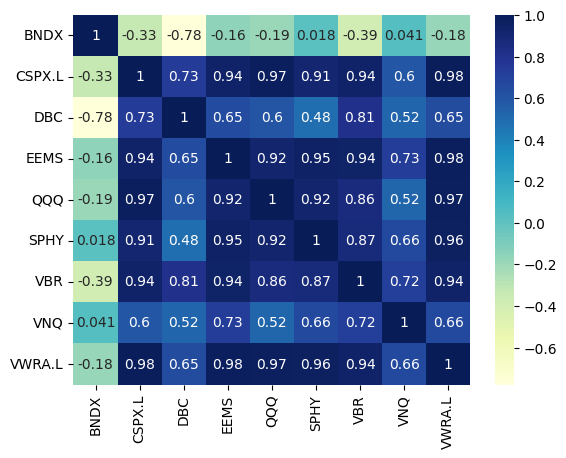

In [3]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

In [4]:
df.drop(columns=["EEMS", "CSPX.L"], inplace=True)

In [5]:
snp_df = pd.read_csv("data/market_prices.csv", parse_dates=True, index_col="Date")

In [6]:
df.head()

,BNDX,DBC,QQQ,SPHY,VBR,VNQ,VWRA.L
Date,,,,,,,
2019-07-23,49.928707,14.556369,187.724213,19.001602,117.640083,73.123878,80.000000
2019-07-24,50.015167,14.491094,189.041656,19.016144,119.433289,73.181824,80.263603
2019-07-25,50.015167,14.435143,187.249542,19.016144,118.180771,72.751366,79.925003
2019-07-26,49.997864,14.453794,189.177246,19.037947,119.108902,73.082489,80.065002
2019-07-29,50.075684,14.509745,188.528275,19.037947,118.685379,73.281151,80.035004


In [7]:
returns_all = df.pct_change().dropna()
training_period = round(len(returns_all)*0.6)

training_df = returns_all.iloc[:training_period, :]
test_df = returns_all.iloc[training_period:,:]

In [8]:
snp_returns = snp_df.pct_change().dropna()
snp_returns = snp_returns.rename(columns={"Adj Close": "mkt"})

In [9]:
training_df.tail()

,BNDX,DBC,QQQ,SPHY,VBR,VNQ,VWRA.L
Date,,,,,,,
2022-07-20,0.000401,-0.000780,0.015856,0.008272,0.008697,-0.002353,0.009079
2022-07-21,0.002004,-0.016784,0.014355,0.007772,0.002916,0.007933,0.002045
2022-07-22,0.008400,-0.011910,-0.017536,-0.000857,-0.007080,0.005212,0.000612
2022-07-25,0.000992,0.018080,-0.005695,0.000429,0.009358,0.001693,0.000102
2022-07-26,0.001783,0.001973,-0.019649,-0.009859,-0.005676,0.001056,-0.010604


In [10]:
test_df.head()

,BNDX,DBC,QQQ,SPHY,VBR,VNQ,VWRA.L
Date,,,,,,,
2022-07-27,-0.000395,0.022844,0.042260,0.011256,0.016492,0.006015,0.010614
2022-07-28,0.008508,0.000770,0.009778,0.014555,0.015414,0.032410,0.015499
2022-07-29,0.002354,0.004617,0.018237,0.002954,0.011185,0.005384,0.010744
2022-08-01,0.004682,-0.020299,-0.000602,-0.002156,-0.000547,-0.008084,0.008345
2022-08-02,-0.005460,-0.005082,-0.002982,0.000000,-0.011249,-0.012836,-0.005911


In [11]:
snp_returns.head()

,mkt
Date,
2015-01-05,-0.018060
2015-01-06,-0.009419
2015-01-07,0.012461
2015-01-08,0.017745
2015-01-09,-0.008013


## Define parameters for backtest

In [12]:
sector_mapper = {
    "QQQ": "equities", 
    "VBR": "equities", 
    # "EEMS": "equities", 
    "VWRA.L": "equities", 
    "DBC": "commodities", 
    "VNQ": "reits", 
    "BNDX": "bonds", 
    "SPHY": "bonds"
}

current_portfolio_val = 27620
from config import estimated_daily_risk_free_rate

## Testing Strategies 

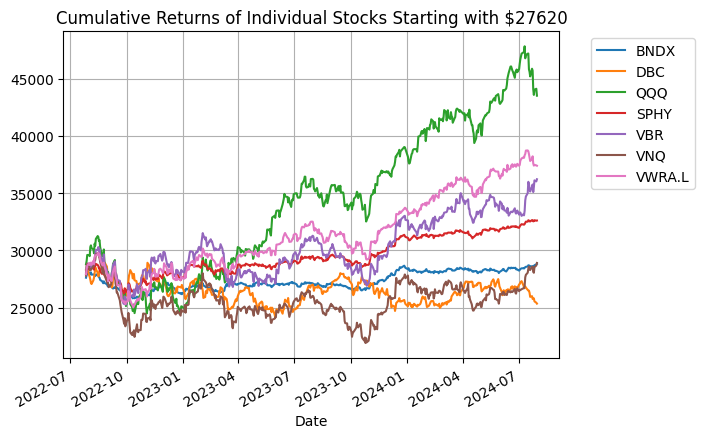

In [13]:
import matplotlib.pyplot as plt

def plot_cum_returns(returns: pd.DataFrame, current_portfolio_val: int, title: str):    
    gross_returns = returns.add(1)
    cum_returns = gross_returns.cumprod()*current_portfolio_val
    cum_returns.plot()
    plt.title(title)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plot_cum_returns(test_df, current_portfolio_val, f'Cumulative Returns of Individual Stocks Starting with ${current_portfolio_val}')

## Compare sharpe ratio on test set

In [14]:
from portfolio_opt_strat import equal_weight_strategy, historical_mvo_expected_ret_strategy, historical_mvo_min_vol_strategy, historical_mvo_strategy, hrpopt_strategy

/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.9118483 0.9118483 0.9118483]' ha

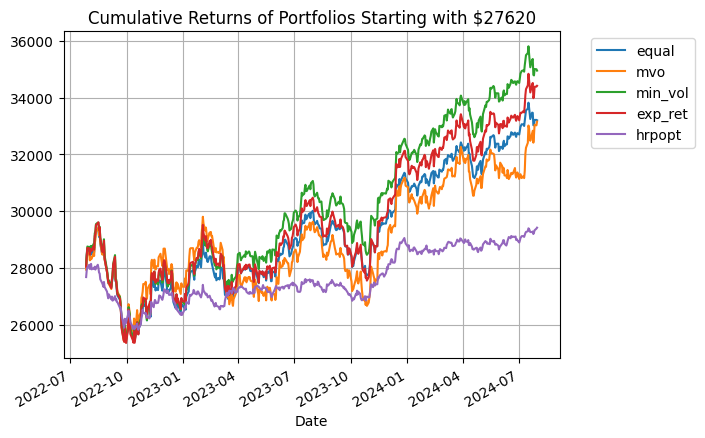

In [15]:
strategy_names = ["equal", "mvo", "min_vol", "exp_ret", "hrpopt"]
portfolio_returns = pd.DataFrame({name: [0] * len(test_df) for name in strategy_names}, index=test_df.index)

equal_weights = equal_weight_strategy(training_df, True, 252)
mvo_weights = historical_mvo_strategy(training_df, True, 252)
mvo_expected_ret_weights = historical_mvo_expected_ret_strategy(training_df, True, 252)
mvo_min_vol_weights = historical_mvo_min_vol_strategy(training_df, True, 252)
hrpopt_weights = hrpopt_strategy(training_df, True, 252)

for ticker in sector_mapper.keys():
    portfolio_returns.loc[:,'equal'] += test_df.loc[:,ticker]*equal_weights[ticker]
    portfolio_returns.loc[:,'mvo'] += test_df.loc[:,ticker]*mvo_weights[ticker]
    portfolio_returns.loc[:,'exp_ret'] += test_df.loc[:,ticker]*mvo_expected_ret_weights[ticker]
    portfolio_returns.loc[:,'min_vol'] += test_df.loc[:,ticker]*mvo_min_vol_weights[ticker]
    portfolio_returns.loc[:,'hrpopt'] += test_df.loc[:,ticker]*hrpopt_weights[ticker]
plot_cum_returns(portfolio_returns, 
                current_portfolio_val,
                f'Cumulative Returns of Portfolios Starting with ${current_portfolio_val}')

In [16]:
def get_annualized_sharpe_ratio(returns):
    print(f"Expected returns {returns.mean()*100*252}")
    print(f"Volatility {returns.std()*100*(252**0.5)}")
    daily_sharpe_ratio = (returns.mean() - estimated_daily_risk_free_rate)/ returns.std()
    return daily_sharpe_ratio * (252 ** 0.5)

for strat in strategy_names:
    print(f"Annualized Sharpe ratio for {strat} strategy over test period = {get_annualized_sharpe_ratio(portfolio_returns.loc[:,strat])}")

Expected returns 10.025085176474814
Volatility 11.476122117893283
Annualized Sharpe ratio for equal strategy over test period = 0.43787310076108604
Expected returns 10.229224300624006
Volatility 13.697584311919936
Annualized Sharpe ratio for mvo strategy over test period = 0.3817625196928645
Expected returns 12.740772819409667
Volatility 12.310587321167471
Annualized Sharpe ratio for min_vol strategy over test period = 0.6287898877171991
Expected returns 12.049611098567496
Volatility 13.080893709572301
Annualized Sharpe ratio for exp_ret strategy over test period = 0.5389242703966589
Expected returns 3.357864610158994
Volatility 5.571595524280414
Annualized Sharpe ratio for hrpopt strategy over test period = -0.29473341750756255


In [17]:
test_df.loc[:,ticker].iloc[-244:].head()

Date
2023-08-04    0.005310
2023-08-07    0.002641
2023-08-08    0.001756
2023-08-09   -0.000877
2023-08-10    0.000000
Name: SPHY, dtype: float64

In [18]:
for ticker in sector_mapper.keys():
    print(f"Annualized Sharpe ratio for {ticker} over test period = {get_annualized_sharpe_ratio(test_df.loc[:,ticker])}")

Expected returns 25.414900530417864
Volatility 21.214857719588448
Annualized Sharpe ratio for QQQ over test period = 0.9622925970211926
Expected returns 15.683427570097468
Volatility 19.41135809385939
Annualized Sharpe ratio for VBR over test period = 0.5503699183972643
Expected returns 16.467735540099646
Volatility 14.326499526124952
Annualized Sharpe ratio for VWRA.L over test period = 0.8004562118742102
Expected returns -3.0341775164993017
Volatility 16.44536368765371
Annualized Sharpe ratio for DBC over test period = -0.48853753976453124
Expected returns 4.534275760270962
Volatility 21.173474341085775
Annualized Sharpe ratio for VNQ over test period = -0.021995645694543875
Expected returns 2.3224726237677062
Volatility 5.724387406025056
Annualized Sharpe ratio for BNDX over test period = -0.4677404211696314
Expected returns 8.786961727169356
Volatility 8.17143777045703
Annualized Sharpe ratio for SPHY over test period = 0.46343885048732986


## Rebalancing portfolio

In [19]:
training_period = 180 # around 6 months
trading_horizon = 120 # around 4 months

equal
Rebalancing for 2022-07-27 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 27852.16704078507
Rebalancing for 2023-01-23 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 29871.37490175583
Rebalancing for 2023-07-20 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 30882.733509568418
Rebalancing for 2024-01-12 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 32997.926196518914
Rebalancing for 2024-07-10 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 33199.80402362017
mvo
Rebalancing for 2022-07-27 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 28534.034589535582
Rebalancing for 2023-01-23 00:00:00
Total transaction costs 13.0849781312325, in percentage 0.00045857441190707795
Current portfolio val 31477.662616698282
Rebalancing for 2023-07-20 00:00:00
Total transaction costs 8.869216674851824, in percentage 0.0002817622

/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
 


Current portfolio val 35417.37844485475
Rebalancing for 2024-07-10 00:00:00
Total transaction costs 7.938888965585129, in percentage 0.00022415236006092506
Current portfolio val 33946.3844964527
min_vol
Rebalancing for 2022-07-27 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 28060.876085719065
Rebalancing for 2023-01-23 00:00:00
Total transaction costs 0.1867731912265463, in percentage 6.656000000000007e-06
Current portfolio val 30871.359889238047
Rebalancing for 2023-07-20 00:00:00
Total transaction costs 0.7987038230543669, in percentage 2.5872000000000006e-05
Current portfolio val 32012.860942289888
Rebalancing for 2024-01-12 00:00:00
Total transaction costs 0.24483436048663343, in percentage 7.648000000000012e-06
Current portfolio val 34827.55132324742
Rebalancing for 2024-07-10 00:00:00
Total transaction costs 0.23209080201811938, in percentage 6.663999999999959e-06
Current portfolio val 34919.44618250636
exp_ret
Rebalancing for 2022-07-27 00:00:00
T

/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/home/sytan98/workspace/orie_5630_pr

Total transaction costs 0.2451525618442807, in percentage 7.64800000000001e-06
Current portfolio val 34872.8152890264
Rebalancing for 2024-07-10 00:00:00
Total transaction costs 0.2323924410860705, in percentage 6.6639999999999586e-06
Current portfolio val 34964.82958033287
hrpopt
Rebalancing for 2022-07-27 00:00:00
Total transaction costs 0, in percentage 0.0
Current portfolio val 27254.939054832364
Rebalancing for 2023-01-23 00:00:00
Total transaction costs 4.300316856227852, in percentage 0.00015778119509188174
Current portfolio val 27906.14938842254
Rebalancing for 2023-07-20 00:00:00
Total transaction costs 3.401424736656046, in percentage 0.00012188799999999998
Current portfolio val 29005.80731811382
Rebalancing for 2024-01-12 00:00:00
Total transaction costs 7.403425407478203, in percentage 0.000255239418999203
Current portfolio val 30272.825179232266
Rebalancing for 2024-07-10 00:00:00
Total transaction costs 5.4339071057306745, in percentage 0.0001794978523992679
Current portf

/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.85316488 0.85316488 0.85316488]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.82773722 0.82773722 0.82773722]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1
/home/sytan98/workspace/orie_5630_proj/venv/lib/python3.9/site-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pa

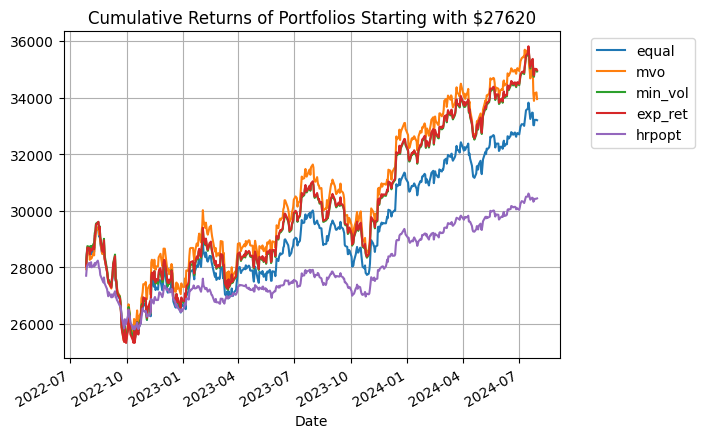

In [20]:
from backtest import backtest_rebalance


strategies = {
    "equal": equal_weight_strategy, 
    "mvo": historical_mvo_strategy, 
    "min_vol": historical_mvo_min_vol_strategy, 
    "exp_ret": historical_mvo_expected_ret_strategy, 
    "hrpopt": hrpopt_strategy
}
portfolio_returns_rebalanced = pd.DataFrame({name: [0] * len(test_df) for name in strategies.keys()}, index=test_df.index)

for strat_name, strat_func in strategies.items():
    print("=" * 20)
    print(strat_name)
    print("=" * 20)
    portfolio_returns_rebalanced[strat_name] = backtest_rebalance(training_df, test_df, training_period, trading_horizon, current_portfolio_val, strat_func)

plot_cum_returns(portfolio_returns_rebalanced, 
                 current_portfolio_val,
                 f'Cumulative Returns of Portfolios Starting with ${current_portfolio_val}')

In [21]:
for strat in strategies.keys():
    print(f"Annualized Sharpe ratio for {strat} strategy over test period = {get_annualized_sharpe_ratio(portfolio_returns_rebalanced.loc[:,strat])}")

Expected returns 10.025085176474814
Volatility 11.476122117893283
Annualized Sharpe ratio for equal strategy over test period = 0.43787310076108604
Expected returns 11.402045040567614
Volatility 13.442079805816077
Annualized Sharpe ratio for mvo strategy over test period = 0.47626893554058486
Expected returns 12.711373549108325
Volatility 12.435271016395848
Annualized Sharpe ratio for min_vol strategy over test period = 0.6201210684464307
Expected returns 12.794477057856051
Volatility 12.57264750329154
Annualized Sharpe ratio for exp_ret strategy over test period = 0.6199551093606535
Expected returns 5.118746626604431
Volatility 5.904016505890409
Annualized Sharpe ratio for hrpopt strategy over test period = 0.020112854780463162


In [22]:
training_instance = test_df.iloc[-training_period:, :]
latest_prices = df.iloc[-1]  # prices as of the day you are allocating
print(latest_prices)
print(f"Training period from {training_instance.index[0]} to {training_instance.index[-1]}")

prev_weight = {
    "BNDX": 0.05,
    "DBC": 0.006,
    "QQQ": 0.23,
    "SPHY": 0.03,
    "VBR": 0.13,
    "VNQ": 0.02,
    "VWRA.L": 0.14,
}
weights = historical_mvo_min_vol_strategy(training_instance, returns_data=True, frequency=252, prev_weight=list(prev_weight.values()))

BNDX       49.430000
DBC        22.070000
QQQ       457.529999
SPHY       23.500000
VBR       197.449997
VNQ        90.730003
VWRA.L    131.419998
Name: 2024-07-30 00:00:00, dtype: float64
Training period from 2023-11-06 00:00:00 to 2024-07-30 00:00:00


In [23]:
for ticker, weight in weights.items():
    print(f"Ticker {ticker}: Weight {weight} Shares {round(weight * current_portfolio_val / latest_prices[ticker], 2)}")

Ticker BNDX: Weight 0.10334 Shares 57.74
Ticker DBC: Weight 0.10182 Shares 127.42
Ticker QQQ: Weight 0.20023 Shares 12.09
Ticker SPHY: Weight 0.1019 Shares 119.77
Ticker VBR: Weight 0.19702 Shares 27.56
Ticker VNQ: Weight 0.09293 Shares 28.29
Ticker VWRA.L: Weight 0.20275 Shares 42.61


<Axes: >

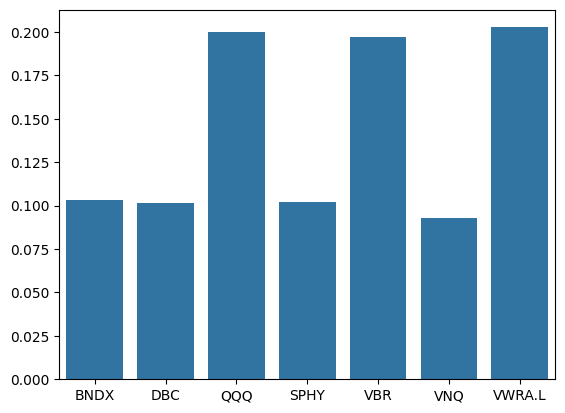

In [24]:
keys = list(weights.keys())
vals = [float(weights[k]) for k in keys]
sb.barplot(x=keys, y=vals)